## Importing the Halo Pipeline
In this section, we'll show the import statement and the initialization of the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

We first create an instance of the `HalosSkyPyPipeline` class, which is imported from the `sim_pipeline.Pipelines.halos_pipeline` module. This pipeline will be used to process data from the YAML file, `halo.yml`. The default settings for various parameters, such as `m_max`, `m_min`, etc., have been carefully chosen to ensure optimal performance and accurate results. We'll delve into the specifics of these parameter choices and their importance in the subsequent sections. Additionally, you can refer to the `readme.md` file in the `data/Skypy` folder for more information on the default settings.

In [9]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(
    sky_area=0.0001, m_max="1.0E+16", m_min="1.0E+12", z_max=5.00
)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

        z                 mass       
------------------ ------------------
   3.6966368210428 1222583363965.3384
 4.599214246552467 1033612284272.2029
1.7605225057258147 1322997580052.3596
 2.101540194422149  4108175309642.238
 4.338091635651262  1124432410408.898
 2.140813976302013 2888071828305.8022
2.1152019726786278 1360452371018.0654
 3.136550679377045  4602327035055.435
 4.046855504881552 1474469457537.7283
 2.271539352725648 1396159867311.9268
               ...                ...
0.7928671640892492  3674815106813.279
 4.974612255716974 1277567957013.1824
 3.408450192429754 1051565867488.0955
 2.152050003690463 1355537726465.0405
2.0991750191614575 2074846897306.2732
 1.669701533572807 1123964129276.0837
2.3326170681271576  1532282676559.714
2.4376815666608773   2241182563618.85
3.8236853034969656 1161860511344.3914
1.3903000054801455 1122666653732.6707
3.2944407207265303 1064735354738.5068
Length = 25 rows


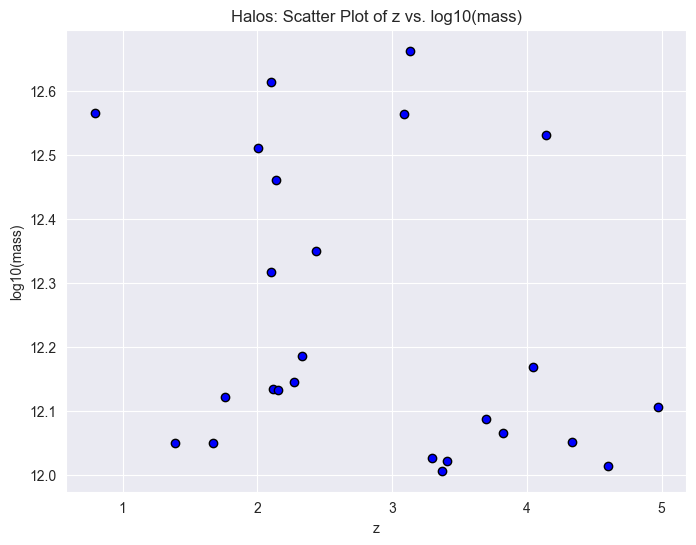

        z                kappa_ext       
------------------ ----------------------
0.9038544608721562  -0.016505344602755552
1.1803651695382404  -0.013632490812946043
1.4038562929342562  -0.012051304141922608
1.6045265905956343  -0.010952538999740719
1.7932012511482218  -0.010103772534056537
 1.975141388474056  -0.009407027221330355
2.1533380873961607  -0.008812138914744926
2.3296704730697804  -0.008290124158351505
2.5054125269928105   -0.00782315580667288
 2.681486194660673  -0.007398606372624272
2.8586000319026934 -0.0070078782376500086
3.0373279731133964  -0.006645104950618498
3.2181550085232526  -0.006305134192923733
3.4015054957893853  -0.005984403838541587
3.5877591465593968  -0.005680162005467688
 3.777265391651981  -0.005389726987474737
3.9703501632322356 -0.0051116527694602485
  4.16732373823993  -0.004843833192544123
 4.368484986330364  -0.004585337565948871
 4.574126147895155  -0.004334614678183419
 4.784535474912665 -0.0040910412763023206
               5.0  -0.00385334737

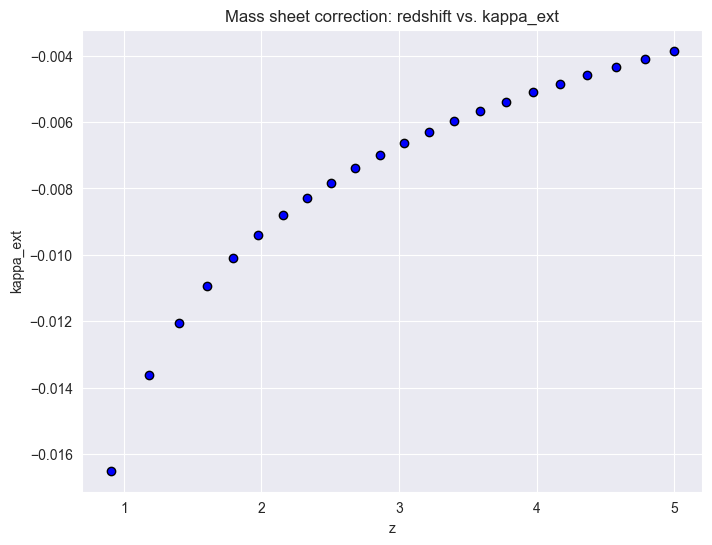

In [10]:
import matplotlib.pyplot as plt
import numpy as np

halos = pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction
print(halos)
z_halos = halos["z"]
mass_halos = halos["mass"]

log_mass = np.log10(mass_halos)
plt.figure(figsize=(8, 6))
plt.scatter(z_halos, log_mass, c="blue", marker="o", edgecolors="black")
plt.title("Halos: Scatter Plot of z vs. log10(mass)")
plt.xlabel("z")
plt.ylabel("log10(mass)")
plt.grid(True)

# Show the plot
plt.show()
print(mass_sheet_correction)
redshifts_mass_correction = mass_sheet_correction["z"]
kappa_ext = mass_sheet_correction["kappa_ext"]
plt.figure(figsize=(8, 6))
plt.scatter(
    redshifts_mass_correction, kappa_ext, c="blue", marker="o", edgecolors="black"
)
plt.title("Mass sheet correction: redshift vs. kappa_ext")
plt.xlabel("z")
plt.ylabel("kappa_ext")
plt.grid(True)

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [11]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(
    halos_list=halos,
    mass_correction_list=mass_sheet_correction,
    sky_area=0.0001,
    cosmo=cosmo,
    samples_number=10000,
)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa, gamma1, gamma2 = halos_lens.get_convergence_shear(
    gamma12=True
)  # when gamma12=False,return kappa,gamma_tot
print("kappa at center is: ", kappa)
print("gamma1 at center is: ", gamma1)
print("gamma2 at center is: ", gamma2)

kappa at center is:  0.10052625030594518
gamma1 at center is:  -0.028174741613161483
gamma2 at center is:  -0.08044810691827345


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [12]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this Halos list, elapsed time for computing weak-lensing maps: 22.135168075561523 seconds
[[ 0.00906874  0.0541553 ]
 [-0.01504189  0.06860819]
 [-0.03124904  0.04494791]
 ...
 [ 0.02878669  0.00296499]
 [ 0.04028766  0.01994441]
 [-0.00910155  0.03324308]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

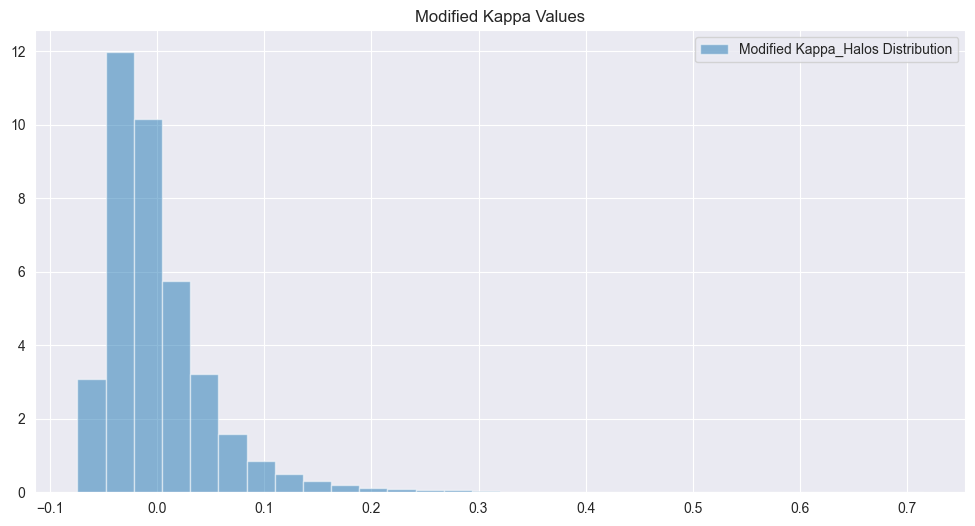

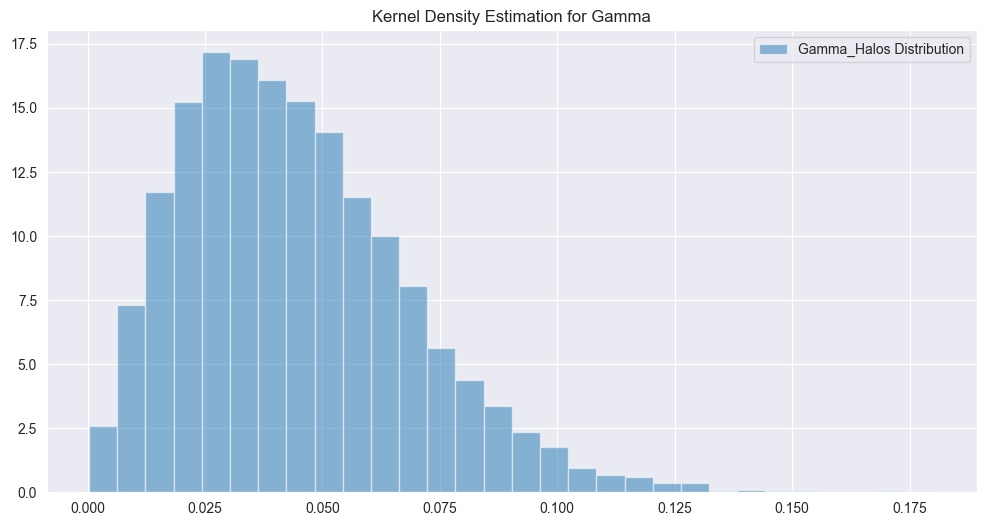

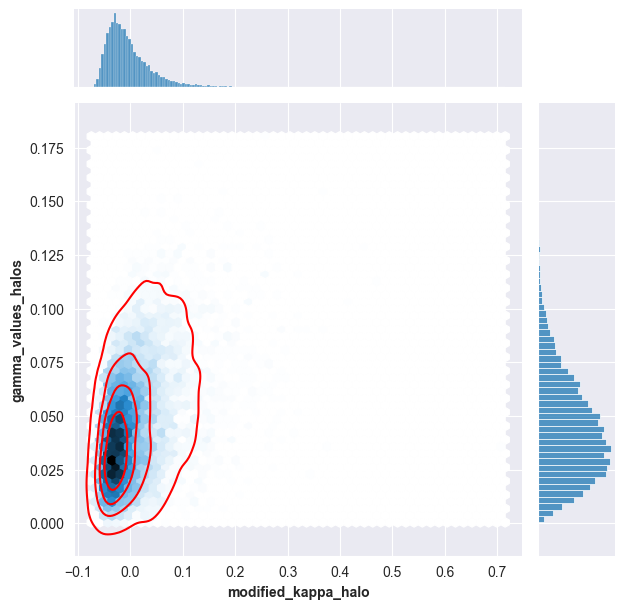

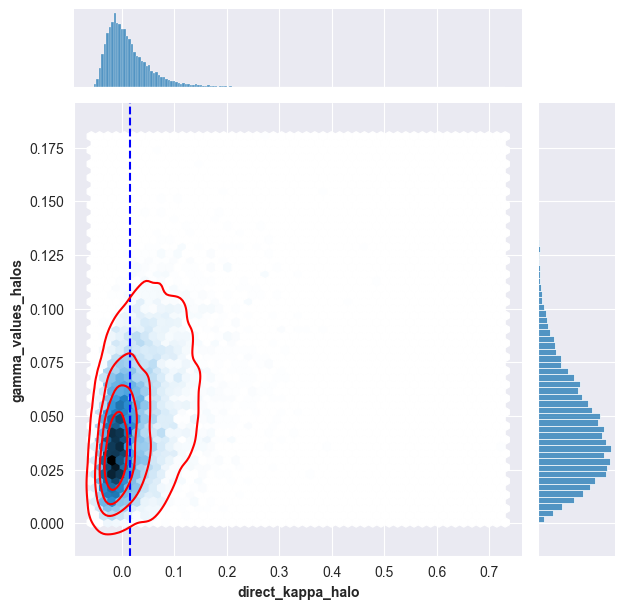

Spearman correlation coefficient:  0.36564034751640345
Kendall Tau correlation coefficient:  0.24934241424142412


In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

kappa_gamma_distribution = np.array(
    kappa_gamma_distribution
)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(
    modified_kappa_halos,
    bins=30,
    density=True,
    alpha=0.5,
    label="Modified Kappa_Halos Distribution",
)
plt.title("Modified Kappa Values")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(
    gamma_values_halos,
    bins=30,
    density=True,
    alpha=0.5,
    label="Gamma_Halos Distribution",
)
plt.title(f"Kernel Density Estimation for Gamma")
plt.legend()
plt.show()

import seaborn as sns

modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos, kind="hex")
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel("modified_kappa_halo", fontweight="bold")
modified_plot.ax_joint.set_ylabel("gamma_values_halos", fontweight="bold")
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos, kind="hex")
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color="blue", linestyle="--")
unmodified_plot.ax_joint.set_xlabel("direct_kappa_halo", fontweight="bold")
unmodified_plot.ax_joint.set_ylabel("gamma_values_halos", fontweight="bold")
plt.show()

from scipy.stats import spearmanr, kendalltau

print(
    "Spearman correlation coefficient: ",
    spearmanr(modified_kappa_halos, gamma_values_halos)[0],
)
print(
    "Kendall Tau correlation coefficient: ",
    kendalltau(modified_kappa_halos, gamma_values_halos)[0],
)

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

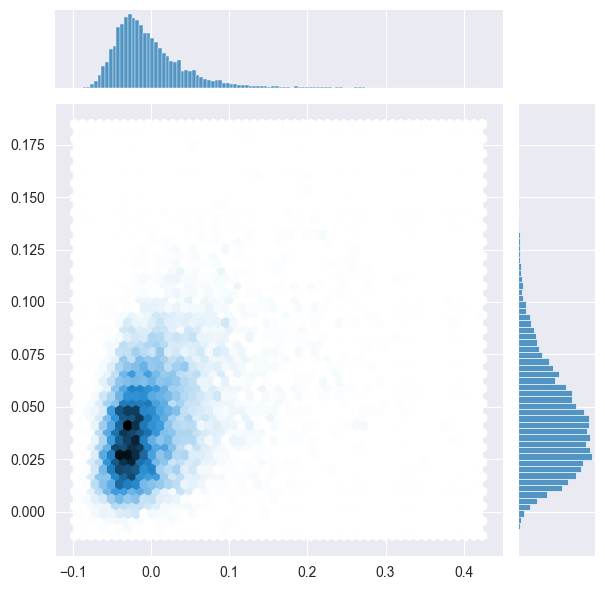

In [14]:
import seaborn as sns

kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind="hex")
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [15]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings

nk, ng = run_halos_without_kde(
    n_iterations=20,
    sky_area=0.0001,
    samples_number=10,
    cosmo=FlatLambdaCDM(H0=70, Om0=0.3),
    m_min=None,
    m_max=None,
    z_max=None,
)

The 20 halo-lists took 153.37646341323853 seconds to run


Visualization of ` run_halos_without_kde()`

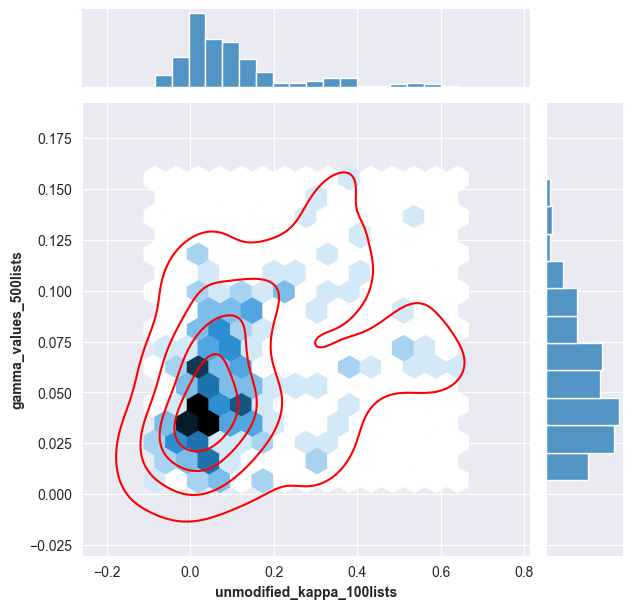

Spearman correlation coefficient:  0.3566084152103803
Kendall Tau correlation coefficient:  0.24311557788944724


In [16]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

modified_plot = sns.jointplot(x=nk, y=ng, kind="hex")
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel("unmodified_kappa_100lists", fontweight="bold")
modified_plot.ax_joint.set_ylabel("gamma_values_500lists", fontweight="bold")
plt.show()
print("Spearman correlation coefficient: ", spearmanr(nk, ng)[0])
print("Kendall Tau correlation coefficient: ", kendalltau(nk, ng)[0])